<a href="https://colab.research.google.com/github/lathamithu/Smart_Finance/blob/master/Smart_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model, metrics 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split 

In [0]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
data.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


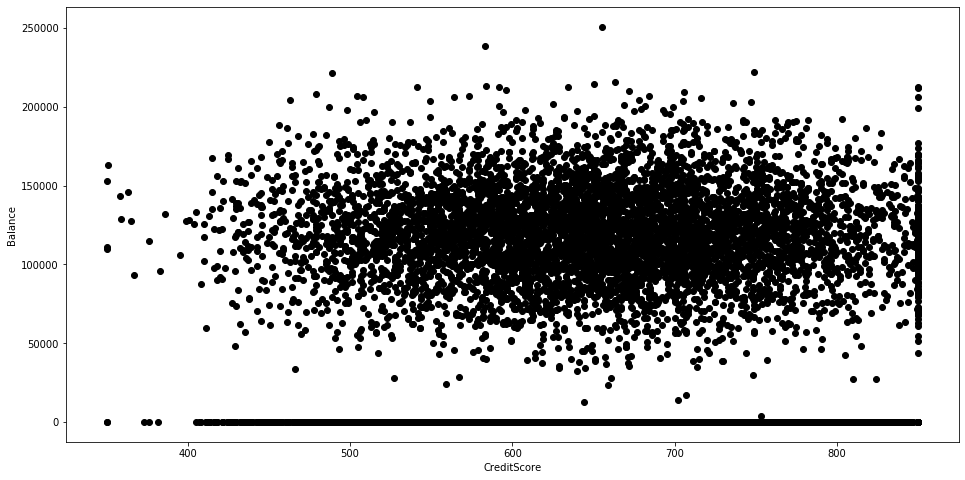

In [0]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['CreditScore'],
    data['Balance'],
    c='black'
)
plt.xlabel("CreditScore")
plt.ylabel("Balance")
plt.show()

In [0]:
X = data['CreditScore'].values.reshape(-1,1)
y = data['Balance'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 7.3853e+04 + 4.0467X


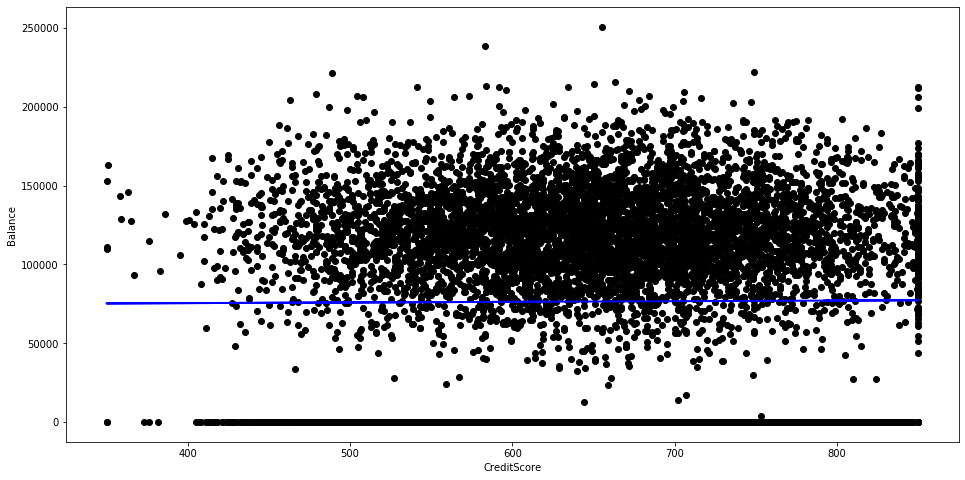

In [0]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['CreditScore'],
    data['Balance'],
    c='black'
)
plt.plot(
    data['CreditScore'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("CreditScore")
plt.ylabel("Balance")
plt.show()

In [0]:
X = data['CreditScore']
y = data['Balance']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3929
Date:                Wed, 05 Feb 2020   Prob (F-statistic):              0.531
Time:                        09:32:29   Log-Likelihood:            -1.2460e+05
No. Observations:               10000   AIC:                         2.492e+05
Df Residuals:                    9998   BIC:                         2.492e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.385e+04   4246.119     17.393      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


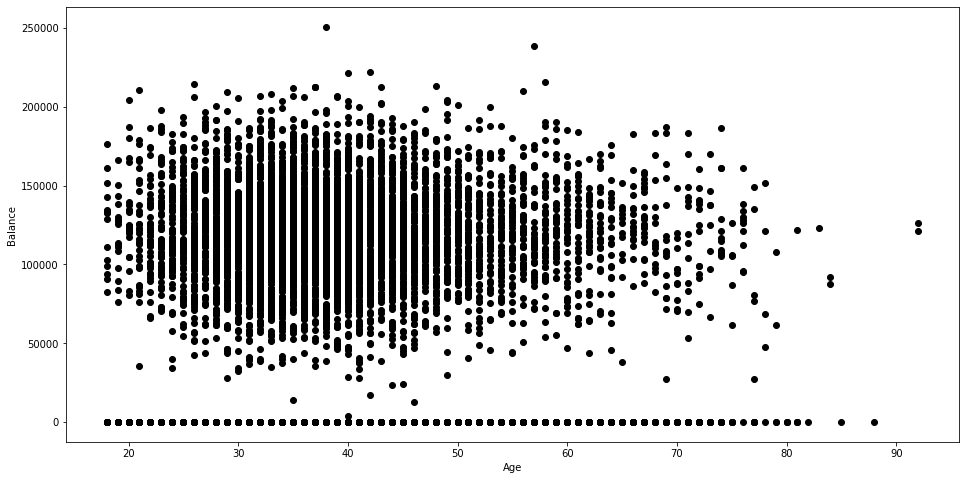

In [0]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Age'],
    data['Balance'],
    c='black'
)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

In [0]:
X = data[['CreditScore','Age','Balance']]
y = data[['EstimatedSalary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = LinearRegression() 
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("mse: ", mean_squared_error(y_test,pred))
print(clf.score(X_test,y_test))
for i in range(len(X_test)):
  print('Actual: ',y_test.iloc[i,0],'           ', 'Predicted: ',pred[i],'           ', 'Difference: ',int(y_test.iloc[i,0])-pred[i] )

NameError: ignored